# Phase 1: Data Creation and Store as CSV

## 1.1 Setup and Imports

In [4]:
import torch                    # core tensor opertation
import torch.nn as nn           # neural network components
import torch.optim as optim     # optimizers from torch
import matplotlib.pyplot as plt   # visualization
import pandas as pd             # numeric manipulation/ dataset read and write

# setting seed for reproducibility
torch.manual_seed(42)           # consistencies in data shuffling and model init

## 1.2 Create Synthetic Data

### 1.2.1 Create Input Features

In [5]:
# generate 100 data points ranging from 0 to 10
X = torch.rand(100,1) * 10

### 1.2.2 Create the Ground Truth Equation

In [6]:
y = 2 * X + 3

# add noise to the y
y = y + torch.randn(100,1)

## 1.3 Save to CSV

In [9]:
# concatenate features and targets
data = torch.cat((X,y), dim=1) # dim = 1 stacks them horizontally. dim=0 vertically

# convert to pandas to convert into CSV
data = pd.DataFrame(data.numpy(), columns = ['X', 'y'])

# save into csv
data.to_csv('data.csv', index=False)

## 1.4 Load and Preview CSV

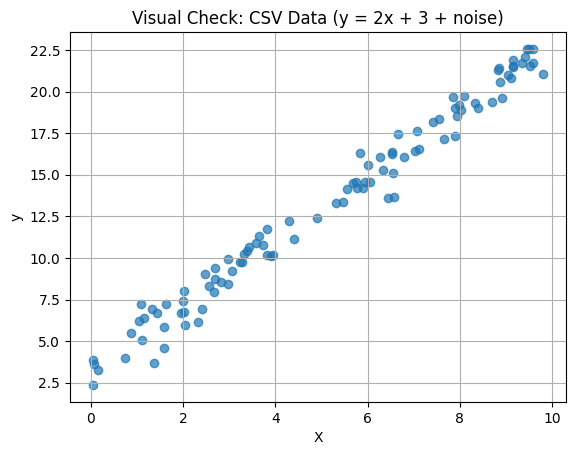

In [18]:
df = pd.read_csv('data.csv')

# creating a scatter plot
plt.scatter(df.X, df.y, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Visual Check: CSV Data (y = 2x + 3 + noise)')
plt.grid(True)
plt.show()

# 2: Custom DataLoader

### 2.1 Why use a custom dataset

In real life cases, we do not use hardcoded tensors. Instead, we often
1. Load data from CSV, Excel, images, databases, or cloud sources
2. Need to run pre-processing or transformations on the fly
3. Want clean, modular and scalable code

There is where pytorch `Dataset` class comes into play.
1. Load data **row-by-row** only when needed (efficient memory usage)
2. Easily plug into a `DataLoader` for batching and shuffling
3. Keep training logic **separate** from data loading logic
4. Can later extend it to include transforms, augmentations, or multi-feature input




## 2.2 build a dataset class

In [ ]:
# import necessary library
from torch.utils.data import Dataset

class LinearRegressionDataset(Dataset):
  def __init__(self, csv_file):
    # load the csv file
    self.data = pd.read_csv(csv_file)

    # seperate X and y + convert into pytorch tensors
    self.X = torch.tensor(self.data.X.values, dtype=torch.float32).view(-1,1)
    self.y = torch.tensor(self.data.y.values, dtype=torch.float32).view(-1,1)

  def __len(self):
    return len(self.data)
